In [2]:
#长文本分类
#用机器学习库scikit-learn

In [3]:
from sklearn.datasets import load_files#载入文件
from sklearn.feature_extraction.text import CountVectorizer#求词频
from sklearn.feature_extraction.text import TfidfVectorizer#求tfidf的
from sklearn.linear_model import LogisticRegression#逻辑回归
from sklearn.naive_bayes import MultinomialNB#朴素贝叶斯
from sklearn.neighbors import KNeighborsClassifier#K近邻算法
from sklearn.svm import SVC#支持向量机
from sklearn.tree import DecisionTreeClassifier#决策树
from sklearn.metrics import classification_report#??
from sklearn.metrics import accuracy_score#
from sklearn.model_selection import cross_val_score#?
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier#随机森林
from matplotlib import pyplot as plt

In [4]:
#1、导入数据标签
categories = ['alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','comp.windows.x','misc.forsale','rec.autos','rec.motorcycles','rec.sport.baseball','sci.med','rec.sport.hockey','sci.crypt','sci.electronics','sci.space','soc.religion.christian','talk.politics.guns','talk.politics.mideasttalk.politics.mideast','talk.politics.misc','talk.religion.misc']

In [5]:
#导入训练数据
train_path = '/Users/wangjing/Desktop/学习/19门专业基础/Python/Python编程与新媒体文本挖掘/20news-bydate-train'
dataset_train = load_files(container_path=train_path,categories=categories)
#导入评估数据
test_path = '/Users/wangjing/Desktop/学习/19门专业基础/Python/Python编程与新媒体文本挖掘/20news-bydate-test'
dataset_test = load_files(container_path=test_path,categories=categories)

In [6]:
#2、数据准备与理解
#计算词频
count_vect = CountVectorizer(stop_words = 'english', decode_error='ignore')
X_train_counts = count_vect.fit_transform(dataset_train.data)#求训练集的词频
#查看数据维度
print(X_train_counts.shape)

#计算TF-IDF：=(文件词频/文件长度)*log(总文档数N/含有特定词语的文档数)
tf_transformer = TfidfVectorizer(stop_words = 'english', decode_error='ignore')
X_train_counts_tf = tf_transformer.fit_transform(dataset_train.data)
#查看数据维度
print(X_train_counts_tf.shape)
#设置评估算法的基准
num_folds = 10#交叉验证的折数，一般10
seed = 7
scoring = 'accuracy'

(10750, 125091)
(10750, 125091)


In [7]:
X_train_counts[:5]

<5x125091 sparse matrix of type '<class 'numpy.int64'>'
	with 2160 stored elements in Compressed Sparse Row format>

In [8]:
#3、评估算法
#生成算法模型
models = {}#建个字典，以模型名为键，算法为值，下面一一给键赋值
models['LR'] = LogisticRegression() #逻辑回归
models['SVM'] = SVC()#支持向量机
models['CART'] = DecisionTreeClassifier()#决策树分类器
models['MNB'] = MultinomialNB()#朴素贝叶斯分类器
models['KNN'] = KNeighborsClassifier()#K近邻分类器

#比较算法
results = []
for key in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    cv_results = cross_val_score(models[key],X_train_counts_tf, dataset_train.target, cv = kfold, scoring=scoring)
    results.append(cv_results)
    print('%s:%f(%f)' % (key, cv_results.mean(), cv_results.std()))



LR:0.899535(0.006961)
SVM:0.904093(0.007078)
CART:0.648930(0.004801)
MNB:0.877581(0.006838)
KNN:0.791442(0.009737)


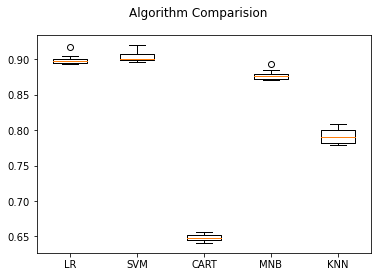

In [9]:
#箱线图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()